## 1. 딥러닝 프레임워크 
딥러닝 프레임워크는 왜 필요할까요?

딥러닝을 하기 위해선 이런 것들이 필요합니다. 
- 역전파 기능
- 모델을 gpu에서 돌릴 수 있도록 하는 기능 
- 데이터를 gpu에 올리는 기능
- 모델 구조를 구현
- 역전파할 때의 optimizer
- learning rate 조정을 할 수 있는 scheduler
- 기타 등등...

이것들을 매번 구현하기에는 시간도 오래걸리고 매번 효율화를 할 수 없습니다.<br>
그래서 우리는 딥러닝 프레임워크를 사용하면 미리 정의된 클래스, 메소드를 사용하여 **비교적 간단하게(!)**구현할 수 있습니다<br>
대표적인 프레임워크로는 tensorflow와 pyTorch가 있습니다

## 2. tensorflow vs. torch

## 3. torch 기본 텐서조작 

torch의 자료형으로는 tensor가 있습니다. tensor는 기본적으로 numpy.array와 유사하며 메소드도 공유하고 있습니다.<br>
numpy.array를 잠깐 복습해봅시다.

In [1]:
import torch
import numpy as np

In [2]:
X = np.array([[0, 1, 0], [0, 0, 0]])
print(X) 
print(X.shape)

[[0 1 0]
 [0 0 0]]
(2, 3)


In [3]:
X = np.zeros((2, 5))
print(X)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### 문제 1: 2 by 3 np.array를 1 by 6으로 만들어보세요
**hint : reshape**

In [4]:
# X.reshape((-1, 6))

이 때 shape이 (1, 6)과 (6,)은 다름을 알아둡시다! 

In [5]:
np.ones(6), np.ones((1, 6))

(array([1., 1., 1., 1., 1., 1.]), array([[1., 1., 1., 1., 1., 1.]]))

torch의 tensor는 이와 매우 유사합니다. 이 때, torch.Tensor와 torch.tensor는 사용법이 다름을 유의합시다

In [6]:
X = torch.Tensor(3, 5) # 3 by 5 random tensor생성, np.random.rand와 같은 기능

In [7]:
X

tensor([[ 3.2487e+33,  5.8687e-02,  2.9287e-43,  0.0000e+00, -3.9788e+03],
        [ 4.5608e-41, -3.9788e+03,  4.5608e-41,  5.8270e-10,  8.2990e-33],
        [ 1.3563e-19,  1.3563e-19,  1.3563e-19,  2.4754e-12,  2.4756e-12]])

In [8]:
X = torch.tensor([3, 6]) # torch.tensor는 리스트나 어레이를 받아 텐서로 만들어줍니다

In [9]:
X

tensor([3, 6])

numpy.array를 torch의 tensor로, 또 torch의 tensor를 numpy.array로 옮길 수 있습니다

In [10]:
np_x = np.ones((3, 5))
print(np_x)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [11]:
torch_x = torch.from_numpy(np_x)
print(torch_x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)


tensor에도 다양한 메소드가 있습니다. 그 중 가장 많이 쓰이는 것 위주로 배워봅시다.<br> 외의 메소드에 대해서는 공식 문서를 참고합시다.
https://pytorch.org/docs/stable/tensors.html

### squeeze / unsqueeze
squeeze와 unsqueeze는 차원을 줄이거나 늘릴 때 사용하는 메소드입니다

In [12]:
print(torch_x.shape)
torch_x = torch_x.unsqueeze(0)
print(torch_x.shape)         # unsqueeze는 입력으로 받은 차원을 하나 더 생성해줍니다
torch_x = torch_x.squeeze(0) # squeeze는 입력으로 받은 차원의 크기 1이라면 차원을 제거해줍니다
print(torch_x.shape) 
torch_x = torch_x.squeeze(1) # 차원의 크기가 1이 아니라면 제거할 수 없습니다
print(torch_x.shape) 

torch.Size([3, 5])
torch.Size([1, 3, 5])
torch.Size([3, 5])
torch.Size([3, 5])


### transpose / permute
transpose와 permute는 차원의 위치를 변경하는데 사용됩니다

In [13]:
torch_x = torch_x.permute(1, 0) # 1번째 차원을 0번째 차원으로, 0번째 차원을 1번째 차원으로
print(torch_x.shape)
      
torch_x = torch_x.transpose(1, 0) # 1번째 차원을 0번째 차원으로, 0번빼 차원을 1번째 차원으로
print(torch_x.shape)

torch.Size([5, 3])
torch.Size([3, 5])


### view
np.array의 reshape과 비슷합니다. 그러나 작동방식이 쭉 한줄로 펼친 후 shape에 맞게 자르는 것임에 주의합니다. <br>
그래서 view의 사용은 최대한 자제하는 것이 좋습니다.

In [14]:
x = torch.arange(1, 13)
print(x)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


In [15]:
x_2_6 = x.view(2, 6)
x_2_6

tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])

In [16]:
x_2_6.view(6, 2)

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]])

### 문제 2 : x_2_6을  위와 같이 만드려면 어떻게 해야할까요?
tensor([[ 1,  7],<br>
        [ 2,  8],<br>
        [ 3,  9],<br>
        [ 4, 10],<br>
        [ 5, 11],<br>
        [ 6, 12]])<br>
**hint :** 방금 배움

In [17]:
# x_2_6.transpose(1, 0)

## 4. Neural Network 
이제 뉴럴 네트워크를 만들어봅시다<br>
Fully Connected Network를 사용하여 가상의 데이터 분포를 근사하는 모델을 만들어봅시다 

In [18]:
from torch import nn
from torch.nn import MSELoss
import torch
import matplotlib.pyplot as plt

## 네트워크 쌓기
torch는 `nn.Module`이라는 클래스를 상속하여 간단하게 모델을 만들 수 있습니다.<br>
오늘은 첫 시간이니, FCN를 쌓을 수 있는 `nn.Linear`와 활성화 함수인 `nn.ReLU`를 활용하여 아주 간단한 네트워크를 쌓을 겁니다.<br>
네트워크를 쌓을 때는 항상 input의 차원을 잘 확인하여 정의하는 것이 가장 중요합니다.

## `nn.Linear`
`nn.Linear`는 FCN을 간단하게 짤 수 있습니다.<br>
처음에 정의할 때는 **torch.nn.Linear(입력값의 차원, 출력값의 차원)** 를 받습니다.


In [19]:
# 컬럼이 5개인 데이터가 10개 있는 상황입니다
X = torch.Tensor(10, 5) 

In [20]:
# 컬럼 5개에 weight를 곱한 뒤 3개의 output_dim으로 내보내는 층입니다
linear = nn.Linear(5, 3) 

# `nn.ReLU`
뉴럴 네트워크가 학습이 가능한 것은 단순 선형결합이 아닌 활성화함수(activation function)이라고 하는 비선형 함수를 사용하기 때문입니다.<br> 
ReLU의 수식은 아주 간단합니다. $$ReLU(x) = max(0, x)$$<br>
바로 0 이상은 그대로 출력하고 0 이하는 0으로 바꿔버리는 활성화 함수입니다. 그래프는 아래와 같이 생겼습니다.<br>

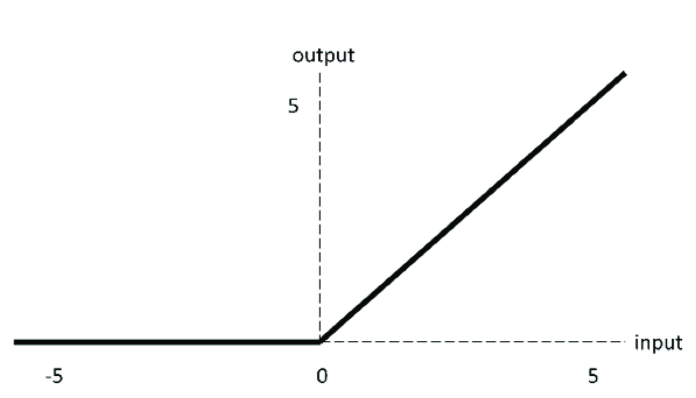

In [21]:
# 컬럼이 5개인 데이터가 10개 있는 상황입니다
X = torch.rand(10, 5) 
print(X) # 모두 양수입니다

tensor([[0.6282, 0.7190, 0.7569, 0.0840, 0.9787],
        [0.3405, 0.7130, 0.3404, 0.9450, 0.0836],
        [0.7774, 0.5039, 0.0087, 0.5204, 0.6636],
        [0.7376, 0.5423, 0.4162, 0.2060, 0.4995],
        [0.0258, 0.4334, 0.2667, 0.9312, 0.5580],
        [0.5213, 0.0043, 0.7148, 0.4030, 0.0669],
        [0.6967, 0.6883, 0.8866, 0.4964, 0.1758],
        [0.6180, 0.3567, 0.2843, 0.2960, 0.2781],
        [0.9729, 0.7218, 0.1446, 0.8563, 0.1490],
        [0.3482, 0.3750, 0.8039, 0.9199, 0.7647]])


In [22]:
# ReLU의 효과를 보기위해서 [-1 ~ 1] 사이의 uniform distribution으로 바꿔줍시다.
# torch에서 메소드 뒤에 _가 붙으면 그 자체를 바꿔주어서 
# X = X.uniform_(.,,) 과 같이 적지 않아도 됩니다
X.uniform_(-1, 1)
print(X) # 이제는 음수와 양수가 있는 것을 볼 수 있습니다 

tensor([[ 0.7126,  0.9661,  0.5655,  0.8585,  0.8941],
        [ 0.1995,  0.0054, -0.0936, -0.1030, -0.7881],
        [ 0.2709,  0.4300,  0.8637,  0.4902, -0.9786],
        [ 0.3340,  0.8792,  0.0597, -0.6176,  0.3160],
        [-0.4987,  0.5995, -0.5453,  0.2245,  0.0867],
        [-0.8744, -0.9338,  0.1004,  0.7634, -0.3408],
        [ 0.9198, -0.4139, -0.4100, -0.0715, -0.6920],
        [-0.5803, -0.4096,  0.5389,  0.8557,  0.0187],
        [-0.2572, -0.6866, -0.8784,  0.8616,  0.9071],
        [ 0.4520, -0.9343, -0.0024,  0.2635, -0.5635]])


In [23]:
relu = nn.ReLU()

In [24]:
relu(X) # ReLU 함수를 거치니 음수는 다 0으로 바뀐 것을 알 수 있습니다

tensor([[0.7126, 0.9661, 0.5655, 0.8585, 0.8941],
        [0.1995, 0.0054, 0.0000, 0.0000, 0.0000],
        [0.2709, 0.4300, 0.8637, 0.4902, 0.0000],
        [0.3340, 0.8792, 0.0597, 0.0000, 0.3160],
        [0.0000, 0.5995, 0.0000, 0.2245, 0.0867],
        [0.0000, 0.0000, 0.1004, 0.7634, 0.0000],
        [0.9198, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5389, 0.8557, 0.0187],
        [0.0000, 0.0000, 0.0000, 0.8616, 0.9071],
        [0.4520, 0.0000, 0.0000, 0.2635, 0.0000]])

# 실전! 네트워크 쌓기
이제 정말 네트워크를 쌓을 시간입니다.<br>
파이토치에서 네트워크를 쌓을 때는 아래와 같은 문법으로 적게 됩니다.

In [25]:
class fcn(nn.Module): 
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        '''
        여기에 두번째 linear 함수를 정의주세요!
        self.fc2 = ...
        '''
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, src):
        output = self.fc1(src) # [batch size, hidden_size]
        output = self.relu(output)
        '''
        여기에 두번째 linear 함수를 쌓아주세요!
        '''
        output = self.fc2(output)
        return output

## 모델 정의

In [26]:
input_dim = 1
hidden_dim = 200
batch_size = 1000
output_dim = 1

In [27]:
model = fcn(input_dim, hidden_dim, output_dim)

## loss, optimizer 정의 

In [28]:
loss = nn.MSELoss()
optim = torch.optim.Adam(model.parameters())

In [29]:
# device = 'cuda'
# model.to(device);

weight를 초기화 해줍니다. 오늘은 uniform distribution으로 초기화합니다.

In [30]:
def initialize_weights(m):
    for name, param in m.named_parameters():
        torch.nn.init.uniform(param.data)

In [31]:
model.apply(initialize_weights);

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


## 모델 학습

In [32]:
device ='cpu'

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


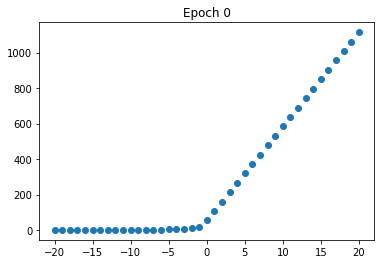

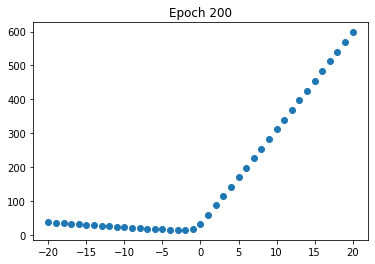

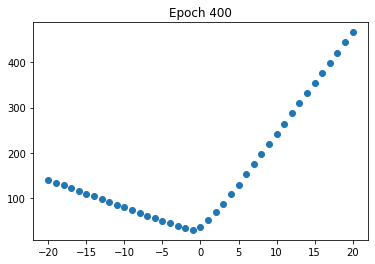

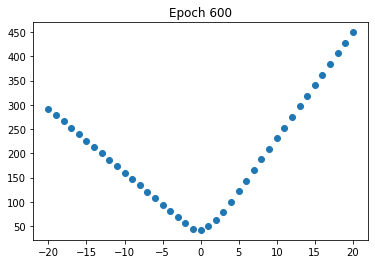

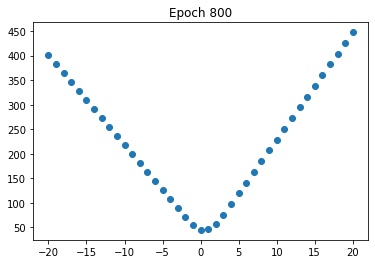

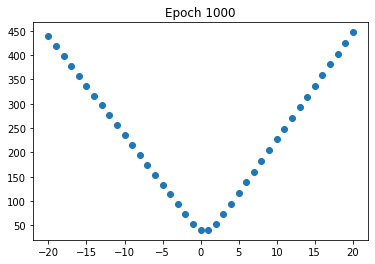

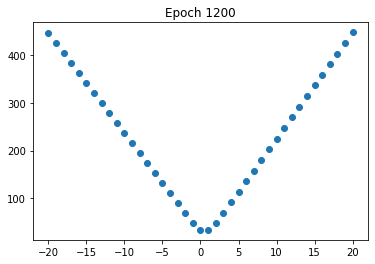

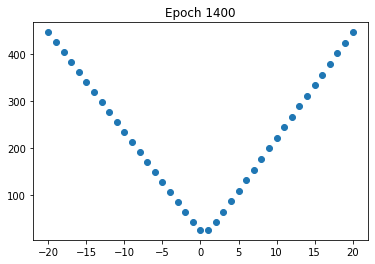

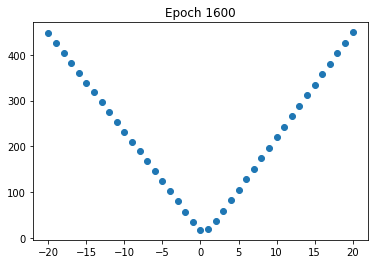

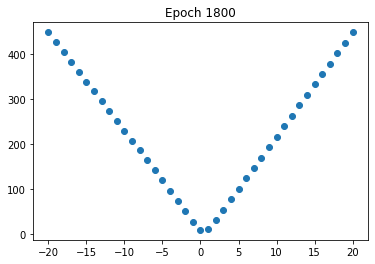

In [33]:
output_list = []
for _ in range(2000):
    optim.zero_grad()
    x = torch.FloatTensor(batch_size, input_dim).uniform_(-30, 30) # batch size, input_dim
    y = x ** 2
    x = x.to(device)
    y = y.to(device)
    output = loss(model(x), y)
    output.backward()
    optim.step()
    if _ % 200 == 0:
        model.eval()
        with torch.no_grad():
            xx = torch.range(-20, 20, 1)
            yy = model(xx.unsqueeze(1).to(device))
            plt.scatter(xx, yy.data.cpu())
            plt.title(f'Epoch {_}')
            plt.show()

## 실습해봅시다 & 생각해봅시다
- `reLU`말고 다른 활성화 함수를 사용해봅시다. 초기 그래프는 어떤 모양으로 그려지나요? 왜 그럴까요?
- 활성화 함수를 빼고 FC1 + FC2 두개로만 학습을 해봅시다. 학습이 잘 되나요? 안된다면 그 이유는 무엇일까요? 자유롭게 생각해봅시다